# Introduction to Deep Learning final project: Optimizers study
###### By Asier Zapata, Enric Moreu and Eudald Cumalat

In this project we will try different optimizers in order to reach the best possible performance of our model. 

## What is an optimizer?
It is an algorithm that tries to find the parameters that minimize the expected risk. We will study four different algorithms: SGD, RMSProp, Adadelta and Adam.

First, we import all the libraries we will be using in this notebook.

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils

Now we load the MNIST dataset, flatten the images and normalize the values.

In [77]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.

In [78]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In the following sections we define some function to simplify the implementation of the optimizers:
* ** optimizerPlot: ** Display two graphs with the data, labels and title provided in the arguments.
* ** modelFactory: ** Creates the model, and setup all the necessary parameters.
* ** optimizerStudy: ** Apply the optimizer to the model and setup some graph parameters.

In [16]:
def optimizerPlot(data,labels,title):
    plt.plot(data[0], label=labels[0])
    plt.plot(data[1], label=labels[1])
    plt.legend()
    plt.title(title)
    plt.show()
    return

In [40]:
def modelFactory():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [70]:
def optimizerStudy(optimizer):
    model = modelFactory()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=200, verbose=0)
    data = [[history.history['acc'],history.history['val_acc']], [history.history['loss'],history.history['val_loss']]]
    labels = [['training accuracy','validation accuracy'],['training loss','validation loss']]
    titles = [optimizer.title()+' accuracy',optimizer.title()+' loss (cat. cross entropy)'] 
    return {'data':data, 'labels':labels, 'titles':titles}

The next two steps use a simple loop to generate all the models and display the accuracy and loss for each optimizer.

In [37]:
optimizers = ['sgd','rmsprop','adadelta','adam']

In [71]:
studyData = {}
for i in optimizers:
    studyData[i] = optimizerStudy(i)

## Results: 

**Stochastic Gradient Descent optimizer**

The SGD optimizer is the most used algorithm for deep learning. It is an stochastic approximation of the gradient descent optimization. This algorithm requires the following arguments:
* **lr**: *float*. Learning rate. 
* **momentum**: *float*. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
* **decay**: *float*. Learning rate decay over each update.
* **nesterov**: *boolean*. Whether to apply Nesterov momentum.

The learning rate updates its step size using this expression: **lr = self.lr * (1. / (1. + self.decay * self.iterations))**. It is a crucial parameter to choose because if it is too big, the algorithm may diverge, if it is too small, the algorithm may take too long to reach convergence.

This algorithm does not converge in just 8 epochs, and it only reaches an accuracy of 0.95.

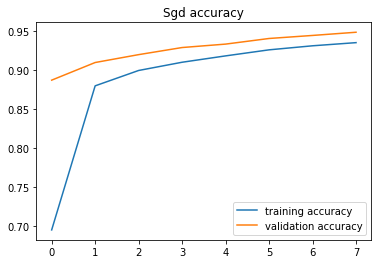

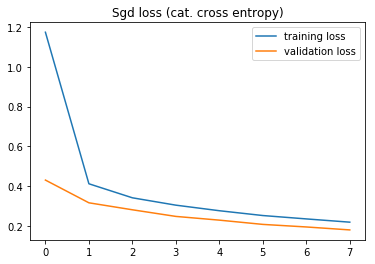

In [73]:
optimizerPlot(studyData['sgd']['data'][0],studyData['sgd']['labels'][0],studyData['sgd']['titles'][0])
optimizerPlot(studyData['sgd']['data'][1],studyData['sgd']['labels'][1],studyData['sgd']['titles'][1])

The following 3 optimizers are extensions or variations of the SGD algorithm.

**RMSProp optimizer**

RMSProp stands for Root Mean Square Propagation. This algorithm changes gradient accumulation by an exponentially decaying average of sum of squares of gradients. It requires the following arguments: 
* **lr**: *float*. Learning rate.
* **rho**: *float*.
* **epsilon**: *float*. Fuzz factor. If None, defaults to K.epsilon().
* **decay**: *float*. Learning rate decay over each update.

In this case, the optimization is performed faster (only one epoch to archieve 0.98 accuracy).
As we can see, at epoch three the system is overtrained and the training accuracy overcome the validation.
This is the SGD variant that gets the optimum value faster, and is usually a good choice for recurrent neural networks.

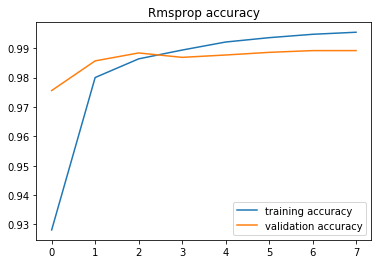

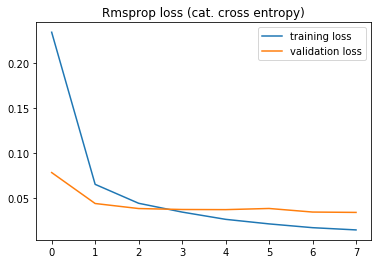

In [74]:
optimizerPlot(studyData['rmsprop']['data'][0],studyData['rmsprop']['labels'][0],studyData['rmsprop']['titles'][0])
optimizerPlot(studyData['rmsprop']['data'][1],studyData['rmsprop']['labels'][1],studyData['rmsprop']['titles'][1])

**Adadelta optimizer**

The Adadelta optimizer is an adaptative learning rate method. It requires the following arguments:
* **lr**: *float*. Learning rate. It is recommended to leave it at the default value.
* **rho**: *float*.
* **epsilon**: *float*. Fuzz factor. If None, defaults to K.epsilon().
* **decay**: *float*. Learning rate decay over each update.

We can see that in this algorithm, we reach convergence at 4 epochs, so it is a bit slower than RMSProp, but it gets approximately the same accuracy (0.985).

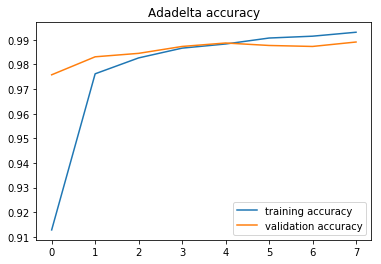

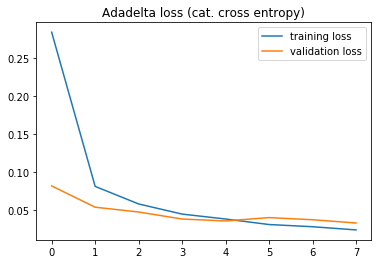

In [75]:
optimizerPlot(studyData['adadelta']['data'][0],studyData['adadelta']['labels'][0],studyData['adadelta']['titles'][0])
optimizerPlot(studyData['adadelta']['data'][1],studyData['adadelta']['labels'][1],studyData['adadelta']['titles'][1])

**Adaptive Moment Estimation optimizer**

The Adam optimizer is a combination of RMSProp and momentum, but:
* Keep	decaying	average	of	both	first-order	moment	of	gradient	(momentum)	and	second-order moment	(RMSProp).
* Includes bias corrections (first and second	moments) to	account	for	their initialization at	origin.	

This algorithm requires the following arguments:
* **lr**: *float*. Learning rate.
* **beta_1**: *float*. Generally close to 1.
* **beta_2**: *float*. Generally close to 1.
* **epsilon**: *float*. Fuzz factor. If None, defaults to K.epsilon().
* **decay**: *float*. Learning rate decay over each update.
* **amsgrad**: *boolean*. Whether to apply the AMSGrad variant of this algorithm from the paper "On the Convergence of Adam and Beyond".

Using the Adam algorithm, we can see that we get the optimum value faster than with Adadelta but slower than with RMSProp. The convergence is reached at 3 epochs and the accuracy obtained is also 0.985 approximately.

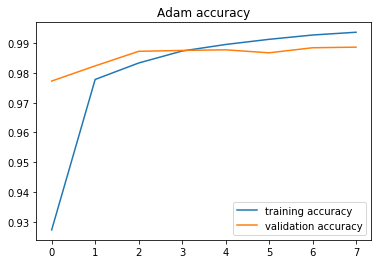

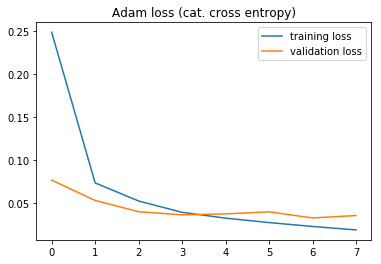

In [76]:
optimizerPlot(studyData['adam']['data'][0],studyData['adam']['labels'][0],studyData['adam']['titles'][0])
optimizerPlot(studyData['adam']['data'][1],studyData['adam']['labels'][1],studyData['adam']['titles'][1])

## Conclusions:

To sum up, the optimizers are a key element in deep learning algorithms. They provide the optimal epoch in which you have to stop training your network in order not to get overtrained. So choosing the one which best fits the problem we are studying is crucial for getting the best possible results.